## Predicting academic performance using demographic and behavioral Data


by Zhengling Jiang, Colombe Tolokin, Franklin Aryee, Tien Nguyen


Packages:


In [1]:
import pandas as pd
import altair as alt
# import altair_ally as ally
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandera as pa
from scipy.stats import shapiro
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate

alt.renderers.enable("mimetype")
%matplotlib inline

## Summary


This project investigates whether a student's mathematics performance can be predicted using demographic and behavioral data, aiming to help educators in supporting students and tailoring educational strategies. Using a Ridge Regression model with optimized hyperparameters (alpha = 1), we achieved a strong predictive accuracy with a cross-validation score of 0.81 and evaluation metrics on the test set including an MSE of 3.83, RMSE of 1.96, and MAE of 1.27. While the model demonstrates robust performance, future work could explore non-linear models and provide confidence intervals for predictions to enhance interpretability and reliability, ultimately contributing to better educational outcomes.


## Introduction


Math teaches us to think logically and it also provides us with analytical and problem-solving skills. These skills can be applied to various academic and professional fields. However, student performance in mathematics can be influenced by many factors, like individual factor, social factor, and family factor. Research has shown that attributes such as study habits, age, social behaviour (alcohol consumptions, etc) and family background can significantly impact a student's academic success (Amuda, Bulus, and Joseph 2016); Modi 2023; Hjarnaa et al. 2023). Understanding these factors is crucial for improving educational outcomes.

In this study, we aim to address this question: **“Can we predict a student's math academic performance based on the demographic and behavioral data?”**. Answering this question is important because understanding the factors behind student performance can help teachers provide support to struggling students. Furthermore, the ability to predict academic performance could assist schools in developing educational strategies based on different backgrounds of students.
The goal of this study is to develop a machine learning model capable of predicting student’s math performance with high accuracy.

The dataset used in this study contains detailed records of student demographics and behaviors, such as age, study habits, social behaviors, and family background. The target variable, mathematics performance, is measured as a continuous score reflecting students' final grade. This dataset offers a great opportunity to explore meaningful relationships between features and academic outcomes.

## Methods & Results


The objective here to prepare the data for our classification analysis by exploring relevant features and summarizing key insights through data wrangling and visualization.


### Dataset Description

The full data set contains the following columns:

1. `school` - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
1. `sex` - student's sex (binary: 'F' - female or 'M' - male)
1. `age` - student's age (numeric: from 15 to 22)
1. `address` - student's home address type (binary: 'U' - urban or 'R' - rural)
1. `famsize` - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
1. `Pstatus` - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
1. `Medu` - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - “ 5th to 9th grade, 3 - “ secondary education or 4 - “ higher education)
1. `Fedu` - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - “ 5th to 9th grade, 3 - “ secondary education or 4 - “ higher education)
1. `Mjob` - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
1. `Fjob` - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
1. `reason` - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
1. `guardian` - student's guardian (nominal: 'mother', 'father' or 'other')
1. `traveltime` - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
1. `studytime` - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
1. `failures` - number of past class failures (numeric: n if 1<=n<3, else 4)
1. `schoolsup` - extra educational support (binary: yes or no)
1. famsup` - family educational support (binary: yes or no)
1. `paid` - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
1. `activities` - extra-curricular activities (binary: yes or no)
1. `nursery` - attended nursery school (binary: yes or no)
1. `higher` - wants to take higher education (binary: yes or no)
1. `internet` - Internet access at home (binary: yes or no)
1. `romantic` - with a romantic relationship (binary: yes or no)
1. `famrel` - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
1. `freetime` - free time after school (numeric: from 1 - very low to 5 - very high)
1. `goout` - going out with friends (numeric: from 1 - very low to 5 - very high)
1. `Dalc` - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
1. `Walc` - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
1. `health` - current health status (numeric: from 1 - very bad to 5 - very good)
1. `absences` - number of school absences (numeric: from 0 to 93)

These columns represent the grades:

- G1 - first period grade (numeric: from 0 to 20)
- G2 - second period grade (numeric: from 0 to 20)
- G3 - final grade (numeric: from 0 to 20, output target)

_Attribution_: The dataset variable description is copied as original from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/320/student+performance).


### Data Loading, Wrangling and Summary


Let's start by loading the data and have an initial view of data set structure.


The file is a `.csv` file with `;` as delimiter. Let's use `pandas`to read it in.


In [2]:
!python ../src/download_data.py

python: can't open file '/home/jovyan/work/notebooks/../src/download_data.py': [Errno 2] No such file or directory


In [3]:
# Validate and load data file format
def load_data(filename: str) -> pd.DataFrame:      
    if os.path.isfile(filename):
        if filename[-4:] == '.csv':
            df = pd.read_csv(filename, delimiter=';')
            return df
    return "File is not in directory"

student_performance = load_data('../data/raw/student-mat.csv')

This provides an overview of the data set with 33 columns, each representing student attributes such as age, gender, study time, grades, and parental details.


Let's get some information on the data set to better understand it.


In [4]:
student_performance.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
student_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

The data set contains 395 observations and 33 columns covering different aspects of student demographics, academic and behavioral traits.


We can see that there is no missing values. There is not need to handle NAs.


The data set includes categorical (school, sex, Mjob) and numerical (age, G1, G2, G3) features.


There is a large range of features but not all of them are necessary for this analysis. Let's proceed and select only the necessary ones.


Let's selected the following key columns:

- Demographic attributes: sex, age
- Academic Attributes: studytime, failures, G1, G2, G3 (grades for three terms)
- Behavioral Attributes: goout (socializing), Dalc (weekday alcohol consumption), Walc (weekend alcohol consumption)

We will also split the dataset into train and test set with a 80/20 ratio. We also set `random_state=123` for reproducibility.


In [6]:
# Necessary columns
columns = ['sex', 
           'age', 
           'studytime', 
           'failures', 
           'goout', 
           'Dalc', 
           'Walc',
           'G3']

subset_df = student_performance[columns]
subset_df = subset_df.drop_duplicates()

train_df, test_df = train_test_split(
    subset_df, test_size=0.2, random_state=123
)

#### Data Validation Checks

In [7]:
# Data validation checks:

# Correct column names
# No empty observations
# Correct data types in each column
# No duplicate observations
# Correct category levels (i.e., no string mismatches or single values)
schema = pa.DataFrameSchema(
    {
        "sex": pa.Column(str, pa.Check.isin(["M", "F"])),
        "age": pa.Column(int, pa.Check.between(15, 22), nullable=False),
        "studytime": pa.Column(int, pa.Check.between(1, 4), nullable=False), 
        "failures": pa.Column(int, pa.Check.between(0, 4), nullable=False),
        "goout": pa.Column(int, pa.Check.between(1, 5), nullable=False),
        "Dalc": pa.Column(int, pa.Check.between(1, 5), nullable=False),
        "Walc": pa.Column(int, pa.Check.between(1, 5), nullable=False),
        "G3": pa.Column(int, pa.Check.between(0, 20), nullable=False)
    },
    checks=[
        pa.Check(lambda df: ~df.duplicated().any(), error="Duplicate rows found."),
        pa.Check(lambda df: ~(df.isna().all(axis=1)).any(), error="Empty rows found.")
    ]
)

schema.validate(subset_df, lazy=True);

Validating missingness...
Missingness is within the acceptable threshold.


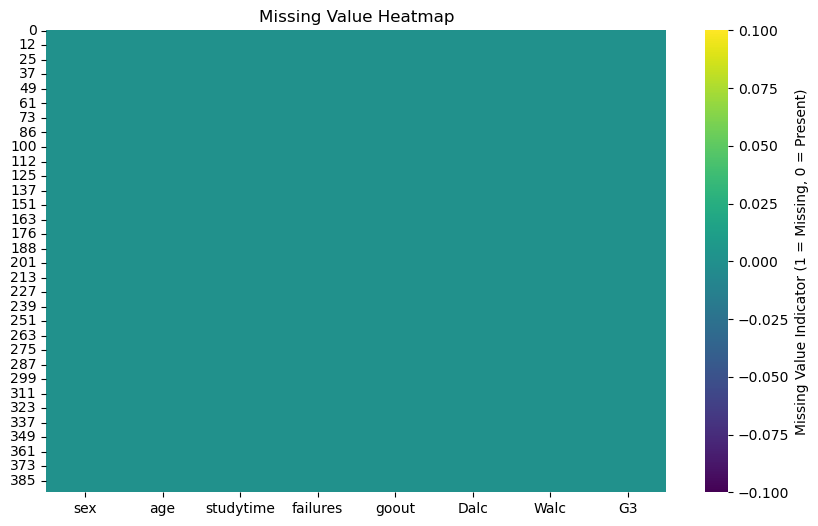

In [8]:
# Missingness Not Beyond Expected Threshold
def validate_missingness(data: pd.DataFrame, threshold: float = 0.05) -> None:
    """
    Validate that missing values in the dataset do not exceed the acceptable threshold and visualize the missingness.

    Parameters
    ----------
    data : pd.DataFrame
        The dataset to check for missing values.
    threshold : float, optional
        The maximum allowable percentage of missing values per column (default is 0.05).

    Returns
    -------
    None
        This function does not return anything. It prints a message indicating whether missing values are within
        the acceptable threshold and displays a heatmap of missing values in the dataset.

    Examples
    --------
    >>> import pandas as pd
    >>> df = pd.DataFrame({
    >>>     'A': [1, 2, None, 4, 5],
    >>>     'B': [None, None, 3, 4, 5],
    >>>     'C': [1, 2, 3, 4, 5]
    >>> })
    >>> validate_missingness(df, threshold=0.1)
    """
    
    print("Validating missingness...")
    missing_percentage = data.isnull().mean()
    above_threshold = missing_percentage[missing_percentage > threshold]

    if above_threshold.empty:
        print("Missingness is within the acceptable threshold.")
    else:
        print(f"Columns with missing values beyond threshold ({threshold}):")
        print(above_threshold)

    # To visualize missingness
    plt.figure(figsize=(10, 6))
    sns.heatmap(
        data.isnull(),
        cbar=True,
        cmap="viridis",
        cbar_kws={'label': 'Missing Value Indicator (1 = Missing, 0 = Present)'}
    )
    plt.title("Missing Value Heatmap")
    plt.show()
validate_missingness(subset_df)

**Figure 1: Missing Values Heatmap**

Validating target distribution...


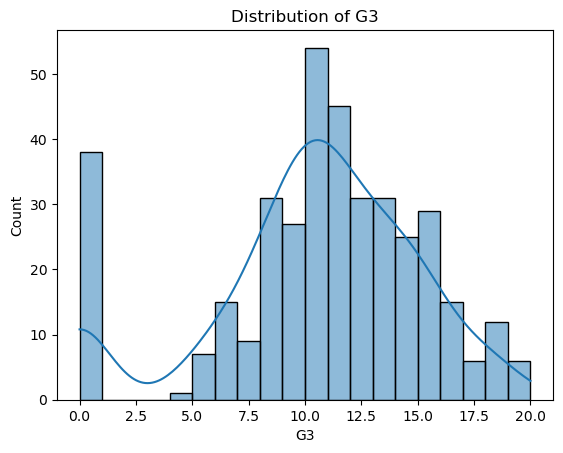

Target variable 'G3' does not follow a normal distribution (p=0.0000).


In [9]:
# Target/Response Variable Follows Expected Distribution
def validate_target_distribution(data: pd.DataFrame, target_column: str) -> None:
    """
    Validate the distribution of the target variable by plotting its histogram and performing a Shapiro-Wilk test.

    Parameters
    ----------
    data : pd.DataFrame
        The dataset containing the target variable.
    target_column : str
        The name of the target column whose distribution is to be validated.

    Returns
    -------
    None
        This function does not return anything. It displays a histogram with a KDE of the target variable
        and prints the result of the normality test.

    Examples
    --------
    >>> import pandas as pd
    >>> df = pd.DataFrame({
    >>>     'target': [1.2, 2.3, 2.9, 3.5, 2.1, 3.8, 4.0, 5.1]
    >>> })
    >>> validate_target_distribution(df, 'target')
    """
    print("Validating target distribution...")
    sns.histplot(data[target_column], 
                 kde=True, 
                 bins=20)
    plt.title(f"Distribution of {target_column}")
    plt.show()
    stat, p = shapiro(data[target_column])
    if p > 0.05:
        print(f"Target variable '{target_column}' follows a normal distribution (p={p:.4f}).")
    else:
        print(f"Target variable '{target_column}' does not follow a normal distribution (p={p:.4f}).")
validate_target_distribution(subset_df, target_column="G3")

**Figure 2: Distribution of the target variable**

#### Checking for Outliers

Before proceeding with preprocessing and modeling, we check for potential outliers or anomalous values in the training dataset.

In [10]:
def validate_no_outliers(data: pd.DataFrame, numeric_columns: list, max_cols: int = 3) -> None:
    """
    Validate the presence of outliers in numeric columns using boxplots.

    Parameters
    ----------
    data : pd.DataFrame
        The dataset containing the numeric columns to be checked for outliers.
    numeric_columns : list
        A list of column names from `data` that contain numeric data to plot.
    max_cols : int, optional
        The maximum number of boxplots to display per row (default is 3).

    Returns
    -------
    None
        This function does not return anything. It displays boxplots for the specified numeric columns.
    
    Examples
    --------
    >>> import pandas as pd
    >>> from matplotlib import pyplot as plt
    >>> import seaborn as sns
    >>> df = pd.DataFrame({
    ...     'A': [1, 2, 3, 4, 100],
    ...     'B': [10, 20, 30, 40, 50],
    ...     'C': [5, 15, 25, 35, 45]
    ... })
    >>> validate_no_outliers(data=df, numeric_columns=['A', 'B', 'C'], max_cols=2)
    """
    print("Validating outliers...")

    num_plots = len(numeric_columns)
    nrows = -(-num_plots // max_cols)
    ncols = min(num_plots, max_cols)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))

    for ax, column in zip(axes.flatten(), numeric_columns):
        sns.boxplot(data=subset_df, x=column, ax=ax)
        ax.set_title(f"Boxplot of {column}")
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.suptitle("Boxplots of Numeric Columns", fontsize=14)
    plt.show()

Validating outliers...


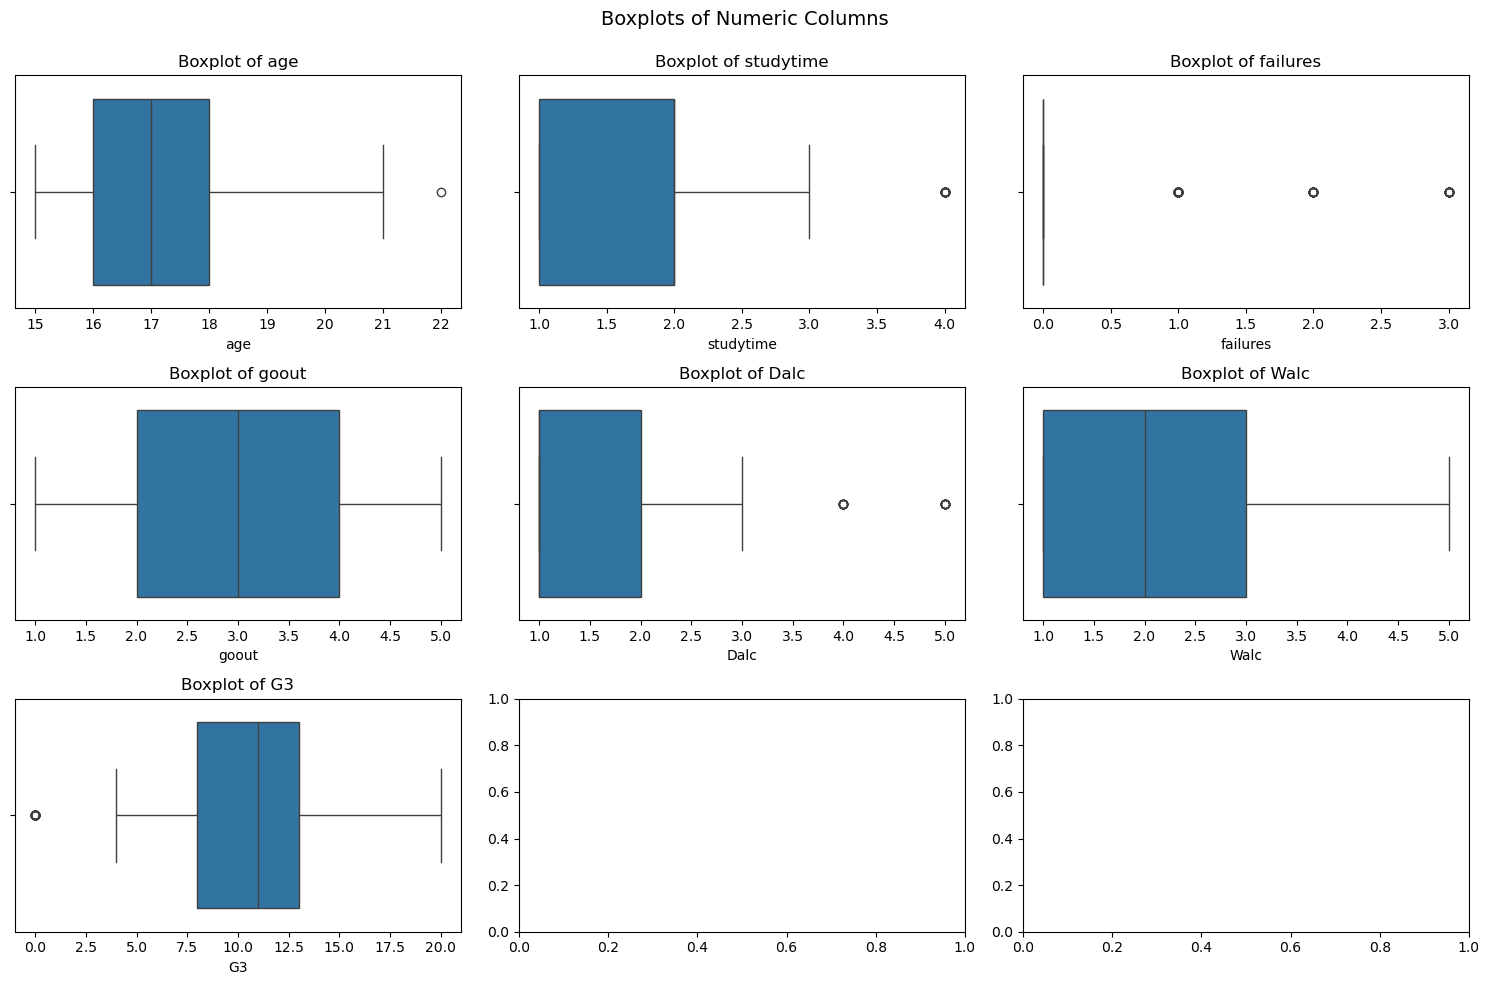

In [11]:
# checking outlier for dataset
numeric_columns = subset_df.select_dtypes(include='number').columns

validate_no_outliers(subset_df, numeric_columns)

**Figure 3: Outliers visualization**

There are few outliers in `failures`, `Dalc`, `age`, `studytime`, `G2`, and `G1`, as seen in the boxplots. These outliers are relatively few compared to the 395 entries, but could still influence model results. We will apply a `StandardScaler` transformation to the numeric variables, the effect of these outliers will be minimized. Therefore, we will not drop or modify these outliers at this step.

In [12]:
import warnings

def validate_anomalous_correlations(data: pd.DataFrame, target_col: str, threshold: float = 0.9, zero_tolerance: float = 1e-5):
    """
    Check for anomalous correlations in a dataset:
    - Between features and the target variable.
    - Among features themselves.
    - Includes checks for zero correlations.

    Parameters
    ----------
    data : pd.DataFrame
        The dataset containing the target and features.
    target_col : str
        The name of the target column in the dataset.
    threshold : float, optional
        The correlation threshold above which correlations are flagged as anomalous (default is 0.9).
    zero_tolerance : float, optional
        The tolerance for detecting zero correlations (default is 1e-5).

    Returns
    -------
    dict
        A dictionary containing:
        - 'feature_to_target': DataFrame of correlations between features and the target.
        - 'feature_to_feature': DataFrame of correlations between features themselves.

    Raises
    ------
    Warning
        Issues warnings for high and near-zero correlations.
    """
    if target_col not in data.columns:
        raise ValueError(f"Target column '{target_col}' not found in the dataset.")
    
    features = data.drop(columns=[target_col])
    target = data[target_col]

    # Compute the full correlation matrix
    correlation_matrix = data.corr()

    # Step 1: Correlations between features and target
    target_correlations = correlation_matrix[target_col].drop(target_col)

    # Check for anomalous (high) correlations
    anomalous_target_corrs = target_correlations[target_correlations.abs() > threshold]
    for feature, corr in anomalous_target_corrs.items():
        warnings.warn(
            f"Anomalous correlation ({corr:.2f}) between feature '{feature}' and target '{target_col}'."
        )

    # Check for zero correlations
    zero_target_corrs = target_correlations[target_correlations.abs() <= zero_tolerance]
    for feature, corr in zero_target_corrs.items():
        warnings.warn(
            f"Zero or near-zero correlation ({corr:.2f}) between feature '{feature}' and target '{target_col}'."
        )

    # Step 2: Correlations among features
    feature_correlations = correlation_matrix.loc[features.columns, features.columns]

    # Check for anomalous (high) correlations among features
    anomalous_feature_corrs = feature_correlations[
        (feature_correlations.abs() > threshold) & (feature_correlations != 1)
    ]
    for feature1 in anomalous_feature_corrs.index:
        for feature2 in anomalous_feature_corrs.columns:
            if feature1 != feature2 and not pd.isna(anomalous_feature_corrs.loc[feature1, feature2]):
                corr = anomalous_feature_corrs.loc[feature1, feature2]
                warnings.warn(
                    f"Anomalous correlation ({corr:.2f}) between features '{feature1}' and '{feature2}'."
                )
                anomalous_feature_corrs.loc[feature1, feature2] = None
                anomalous_feature_corrs.loc[feature2, feature1] = None

    feature_to_target_df = pd.DataFrame({
        'Feature': target_correlations.index,
        'Correlation': target_correlations.values
    }).reset_index(drop=True)

    feature_to_feature_df = feature_correlations.stack().reset_index()
    feature_to_feature_df.columns = ['Feature1', 'Feature2', 'Correlation']
    feature_to_feature_df = feature_to_feature_df[
        feature_to_feature_df['Feature1'] != feature_to_feature_df['Feature2']
    ]

    return {
        'feature_to_target': feature_to_target_df,
        'feature_to_feature': feature_to_feature_df
    }

# a warning will be issue if there are any problems
correlation_check = validate_anomalous_correlations(
    train_df.select_dtypes(include="number"), "G3", threshold=0.95
)

In [13]:
train_df.head()

,sex,age,studytime,failures,goout,Dalc,Walc,G3
6,M,16,2,0,4,1,1,11
111,F,16,3,1,2,1,1,10
287,F,17,3,0,3,1,1,12
130,F,15,3,2,2,2,2,0
185,M,17,2,0,4,2,3,11


In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305 entries, 6 to 378
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sex        305 non-null    object
 1   age        305 non-null    int64 
 2   studytime  305 non-null    int64 
 3   failures   305 non-null    int64 
 4   goout      305 non-null    int64 
 5   Dalc       305 non-null    int64 
 6   Walc       305 non-null    int64 
 7   G3         305 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 21.4+ KB


Let's get a summary of the training set we are going to use for the analysis.


In [15]:
train_df.describe()

,age,studytime,failures,goout,Dalc,Walc,G3
count,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000
mean,16.681967,2.045902,0.321311,3.078689,1.518033,2.311475,10.308197
std,1.238302,0.829865,0.726635,1.112299,0.925073,1.294485,4.711070
min,15.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,1.000000,0.000000,2.000000,1.000000,1.000000,9.000000
50%,17.000000,2.000000,0.000000,3.000000,1.000000,2.000000,11.000000
75%,18.000000,2.000000,0.000000,4.000000,2.000000,3.000000,13.000000
max,21.000000,4.000000,3.000000,5.000000,5.000000,5.000000,20.000000


Key takeaways from summary statistics:

- Final grades `G3` range from `0` to `20`, with an average of around `10.26`.
- The average study time is about `2.05` hours.
- Most students have zero reported failures.
- Alcohol consumption (Dalc and Walc) and socializing habits (goout) appear to vary across the student population.


Let's create a visualization to explore the final grades `G3` distribution. We will use a histogram as it allows us to see the spread.


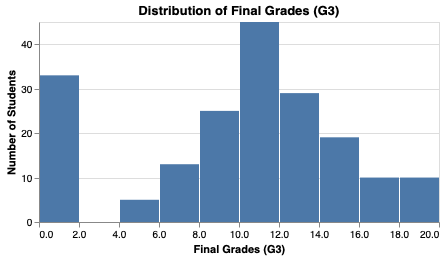

In [16]:
# Visualization of grade distributions
eda_plot1 = alt.Chart(train_df).mark_bar().encode(
    x=alt.X('G3:Q', bin=True, title='Final Grades (G3)'),
    y=alt.Y('count()', title='Number of Students'),
    tooltip=['G3']
).properties(
    title='Distribution of Final Grades (G3)',
    width=400,
    height=200
)
eda_plot1 

**Figure 4: Distribution of Final Grades (G3)**


The histogram shows that most students achieve grades between 8 and 15, with fewer students scoring very low or very high.


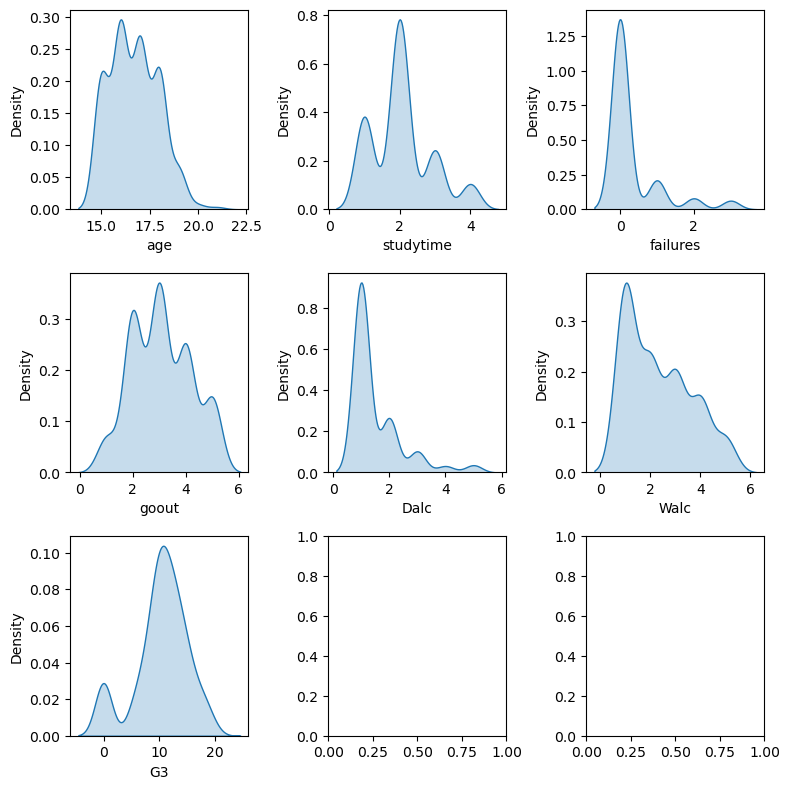

In [17]:
# ally.dist(train_df).properties(title="Density Plot for all numeric columns")
fig, axes = plt.subplots(3, 3, figsize=(8, 8), sharey=False, sharex=False)
axes = axes.flatten()
numeric_columns = train_df.select_dtypes(include='number').columns
for i, column in enumerate(numeric_columns):
    dp = sns.kdeplot(data=train_df, x=column, fill=True, ax=axes[i])
plt.tight_layout()

**Figure 5: Density plot for each numeric columns (including the target `G3`)**

Some interesting observations:

- The distirbution of the grades `G3`, `G2`, `G1` are somewhat bell-shaped.
- Most student do not consume alcohol, or very minimally.
- Most student studies around 2-5 hours a week and most of them also did not fail any previous classes.


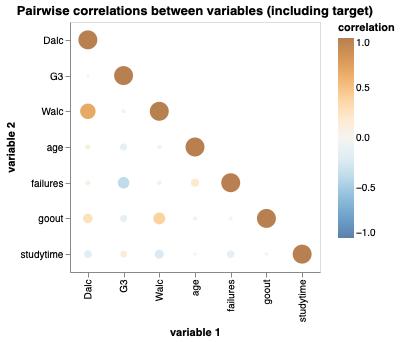

In [18]:
# ally.corr(train_df).properties(title="Correlation matrices for each numeric column pair")
corr_mat = train_df.select_dtypes(include='number').corr() \
    .reset_index(names="var1") \
    .melt(id_vars="var1", var_name="var2", value_name="correlation")
# get rid of "duplicated" correlation
corr_mat = corr_mat[corr_mat['var1'] <= corr_mat['var2']].reset_index(drop=True)
corr_mat["abs_corr"] = np.abs(corr_mat["correlation"])
alt.Chart(corr_mat).mark_circle().encode(
    alt.X("var1").title("variable 1"),
    alt.Y("var2").title("variable 2"),
    alt.Color("correlation").scale(domain=[-1, 1], scheme="blueorange"),
    alt.Size("abs_corr").legend(None)
).properties(
    width=250,
    height=250,
    title="Pairwise correlations between variables (including target)"
)

**Figure 6: Correlation matrices for each numeric columns (including target `G3`)**

Some interesting observations:

- The grades are very correlated with one another
- Alcohol consumptions are somewhat negatively correlated with grades
- Study time are somewhat positively correlated with grades/


### Analysis


In [19]:
# Split features and target
X_train, y_train = (
    train_df.drop(columns=['G3']),
    train_df['G3']
)
X_test, y_test = (
    test_df.drop(columns=['G3']),
    test_df['G3']
)

In [20]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305 entries, 6 to 378
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sex        305 non-null    object
 1   age        305 non-null    int64 
 2   studytime  305 non-null    int64 
 3   failures   305 non-null    int64 
 4   goout      305 non-null    int64 
 5   Dalc       305 non-null    int64 
 6   Walc       305 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 19.1+ KB


### Baseline Model

In [21]:
dr = DummyRegressor()

dummy_cv = cross_validate(dr, X_train, y_train, return_train_score=True)
pd.DataFrame(dummy_cv).agg(['mean']).T

,mean
fit_time,0.001056
score_time,0.000472
test_score,-0.027040
train_score,0.000000


### Define categorical and numerical columns

In [22]:
categorical_feats = X_train.select_dtypes(include=['object']).columns
numeric_feats = X_train.select_dtypes(include=['int64']).columns

In [23]:
# Apply column transformers
preprocessor = make_column_transformer(    
    (StandardScaler(), numeric_feats),  # scaling on numeric features 
    (OneHotEncoder(drop="if_binary"), categorical_feats),  # OHE on categorical features
)

#  Make pipeline
pipe_lr = make_pipeline(preprocessor, Ridge())

In [24]:
# Define parameter grid
param_grid = {
    'ridge__alpha': [0.1, 1, 10, 100]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe_lr, param_grid=param_grid, n_jobs=-1, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         Index(['age', 'studytime', 'failures', 'goout', 'Dalc', 'Walc'], dtype='object')),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(drop='if_binary'),
                                                                         Index(['sex'], dtype='object'))])),
                                       ('ridge', Ridge())]),
             n_jobs=-1, param_grid={'ridge__alpha': [0.1, 1, 10, 100]},
             return_train_score=True)

In [25]:
# Best score
grid_search.best_score_

np.float64(0.1311696005613864)

In [26]:
# Get the best hyperparameter value
grid_search.best_params_

{'ridge__alpha': 10}

In [27]:
# Define the best model
best_model = grid_search.best_estimator_

In [28]:
pd.DataFrame(grid_search.cv_results_)[
    [
        "mean_test_score",
        "param_ridge__alpha",
        "mean_fit_time",
        "rank_test_score",
    ]
].set_index("rank_test_score").sort_index().T

rank_test_score,1,2,3,4
mean_test_score,0.131170,0.129803,0.129564,0.120737
param_ridge__alpha,10.000000,1.000000,0.100000,100.000000
mean_fit_time,0.006967,0.031756,0.066648,0.007936


In [29]:
# Apply best model on test set
y_pred = best_model.predict(X_test)

In [30]:
# Create a dataframe to compare observed and predicted values
comparison = pd.DataFrame({
    "Observed (y_test)": y_test.values,
    "Predicted (y_pred)": y_pred
})
comparison.head(10)

,Observed (y_test),Predicted (y_pred)
0,8,7.534113
1,16,12.559976
2,14,11.450759
3,8,11.293807
4,10,1.804999
5,11,11.875796
6,12,11.746092
7,5,8.692520
8,13,11.545896
9,0,9.268482


In [31]:
# Evaluate performance on the test set
mse = mean_squared_error(y_test, y_pred)    # Mean squared error

rmse = np.sqrt(mse) # Root Mean Squared error

mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error


# Create a data frame to display performance metrics
metrics = pd.DataFrame({
    "Metric": ["Mean Squared Error (MSE)", 
               "Root Mean Squared Error (RMSE)", 
               "Mean Absolute Error (MAE)"],
    "Value": [mse, rmse, mae]
})
metrics.set_index('Metric')

,Value
Metric,
Mean Squared Error (MSE),17.717085
Root Mean Squared Error (RMSE),4.209167
Mean Absolute Error (MAE),3.180680


In [32]:
import seaborn as sns

# Assume coefficients are stored in a matrix `coef` (predictors x responses)
coefs = best_model.named_steps['ridge'].coef_
feature_names = best_model.named_steps['columntransformer']\
    .get_feature_names_out().tolist()
feature_names = [n.split("__")[1] for n in feature_names]

coefs_df = pd.DataFrame({"features": feature_names, "coefs": coefs})
coefs_df

,features,coefs
0,age,-0.283367
1,studytime,0.527055
2,failures,-1.606866
3,goout,-0.643832
4,Dalc,0.045963
5,Walc,0.065063
6,sex_M,1.249318


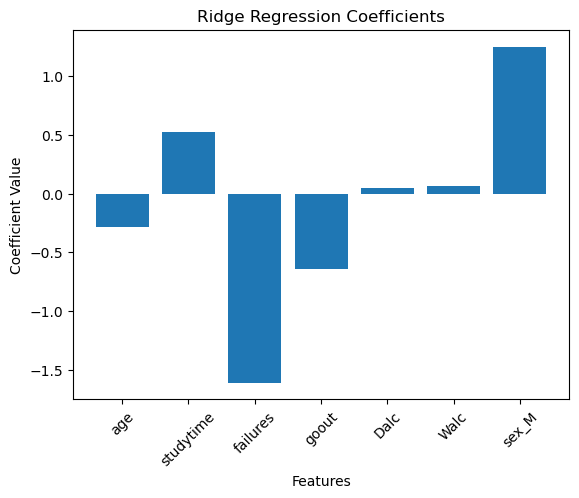

In [33]:
plt.bar(feature_names, coefs)
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Ridge Regression Coefficients")
plt.xticks(rotation=45)
plt.show()

**Figure 7: Ridge regression coefficients**


## Results & Discussion


The Ridge Regression model, with tuned hyperparameters, demonstrated well predictive capabilities on student’s math performance. The optimal hyperparameter for Ridge was found to be alpha = 1, and the best cross-validation score is approximately 0.81. This indicates a strong predictive accuracy during the model's validation phase.

The Ridge coefficients suggests that student performance is most strongly influenced by prior grades, with G2 having the greatest positive impact, followed by G1. Social behaviors like going out and weekend alcohol consumption also show a smaller positive influence, while age, study time, and workday alcohol consumption have a negative effect. Failures and gender appear to have extremely minimal influence on the final grade.

Based on the evaluation on the test set, the model achieved the following performance metrics:

- Mean Squared Error (MSE): 3.83
- Root Mean Squared Error (RMSE): 1.96
- Mean Absolute Error (MAE): 1.27

These metrics suggest that the model is reasonably accurate in predicting students' final grades. However, there are areas for improvement. We can explore other models which could better capture the non-linear relationships and feature interactions. Another improvement we can do is to provide confidence intervals for predictions. This approach could enhance the reliability and interpretability of predictions and help readers make more informed decisions.


## References



1. Amuda, Bitrus Glawala, Apagu Kidlindila Bulus, and Hamsatu Pur Joseph. "Marital Status and Age as Predictors of Academic Performance of Students of Colleges of Education in the Nort- Eastern Nigeria." American Journal of Educational Research 4.12 (2016): 896-902.

2. Cortez, Paulo. "Student Performance." UCI Machine Learning Repository, 2008, https://doi.org/10.24432/C5TG7T.

3. Hjarnaa, Louise, Sanne Pagh, Møller, Alberte Brix, Curtis, Ulrik, Becker, Ove, Andersen, Fartein Ask, Torvik, Janne Schurmann, Tolstrup. "Alcohol Intake and Academic Performance and Dropout in High School: A Prospective Cohort Study in 65,233 Adolescents". Journal of Adolescent Health 73. 6(2023): 1083–1092.

4. Modi, Y. G. “The Impact of Stress on Academic Performance: Strategies for High School Students.” International Journal of Psychiatry, vol. 8, no. 5, 2023, pp. 150–152.
